In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import pandas as pd
import os
import wandb

In [5]:
api = wandb.Api()
entity = "jkratz-carnegie-mellon-university"

# List all projects under your account
# projects = api.projects(entity)

# for project in projects:
#     print(f"Project: {project.name}, Entity: {project.entity}")

In [6]:
# choose project
project = "framestack_corrTest_noNoise_final"

# download only specific runs and metrics
filters = {
    "state": "finished",
    "config.T": {"$eq": 6}}

metrics_to_download = ["ave_max_cross_corr_kn0", "ave_max_cross_corr_U", "ave total reward"]

In [7]:
runs = api.runs(f"{entity}/{project}", filters=filters)

results_folder = "wandb_downloads"
os.makedirs(results_folder, exist_ok=True)

for run in runs:
    print(f"Downloading metrics for Run ID: {run.id}")

    # Fetch only selected metrics
    history = run.history(keys=metrics_to_download)

    # Save to CSV
    history.to_csv(f"{results_folder}/{run.id}.csv", index=False)

print("Download complete.")

Download complete.


In [9]:
# import results and concatenate

# List all CSV files in the directory
csv_files = [f for f in os.listdir(results_folder) if f.endswith(".csv")]

# Load and concatenate them
df_list = []  # Store individual dataframes

for file in csv_files:
    file_path = os.path.join(results_folder, file)
    df = pd.read_csv(file_path)  # Read CSV
    df_list.append(df)

# Combine all dataframes into one
df = pd.concat(df_list, ignore_index=True)

In [ ]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["ave_max_cross_corr_kn0"], df["ave total reward"])
corr_coef = np.round(corr_coef[0,1], 3)

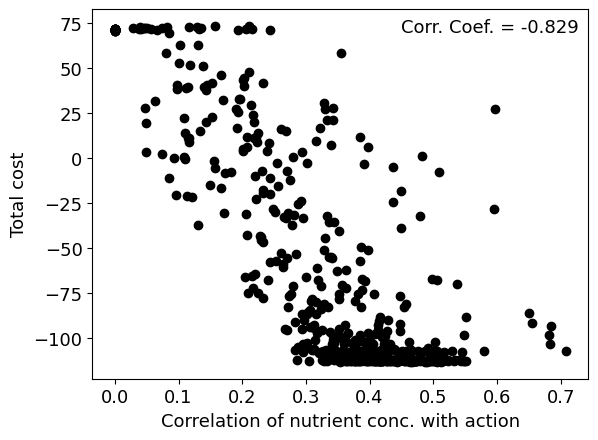

In [ ]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["ave_max_cross_corr_kn0"], df["ave total reward"], color='k')
plt.xlabel("Correlation of nutrient conc. with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(0.45,70))
plt.show()
# fig.savefig('nutr_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')

In [24]:
# calculate correlation coefficient
corr_coef = np.corrcoef(df["ave_max_cross_corr_U"], df["ave total reward"])
corr_coef = np.round(corr_coef[0,1], 3)

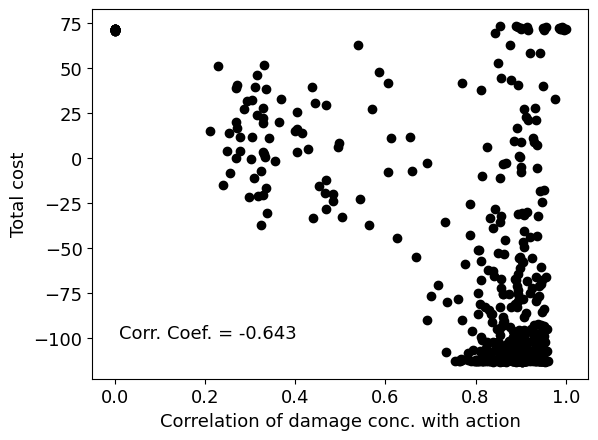

In [27]:
plt.rcParams.update({"font.size": 13})
fig = plt.figure()

plt.scatter(df["ave_max_cross_corr_U"], df["ave total reward"], color='k')
plt.xlabel("Correlation of damage conc. with action")
plt.ylabel("Total cost")
plt.annotate("Corr. Coef. = "+str(corr_coef), xy=(0.01,-100))
plt.show()
# fig.savefig('damage_vs_cost_plot.pdf', dpi=300, bbox_inches='tight')